In [1]:
#Download data set
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import random as rd
import seaborn as sns
import scipy.stats as stats
csv_path="indeed_job_dataset.csv"
job_df=pd.read_csv(csv_path)
job_df.head()
job_df.columns


Index(['Unnamed: 0', 'Job_Title', 'Link', 'Queried_Salary', 'Job_Type',
       'Skill', 'No_of_Skills', 'Company', 'No_of_Reviews', 'No_of_Stars',
       'Date_Since_Posted', 'Description', 'Location', 'Company_Revenue',
       'Company_Employees', 'Company_Industry', 'python', 'sql',
       'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java',
       'Others', 'CA', 'NY', 'VA', 'TX', 'MA', 'IL', 'WA', 'MD', 'DC', 'NC',
       'Other_states', 'Consulting and Business Services',
       'Internet and Software', 'Banks and Financial Services', 'Health Care',
       'Insurance', 'Other_industries'],
      dtype='object')

In [2]:
job_df_group=job_df.groupby("Job_Type").sum()
job_df_group.index.name=""
job_df_group

,Unnamed: 0,No_of_Skills,No_of_Reviews,No_of_Stars,Date_Since_Posted,python,sql,machine learning,r,hadoop,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
,,,,,,,,,,,,,,,,,,,,,
data_analyst,6166127,8052,3606928.0,5824.399980,37356.0,512,1044,166,456,126,...,55,48,46,625,180,162,145,163,72,477
data_engineer,6929475,14948,3511154.0,4343.599995,29763.0,901,867,289,228,761,...,20,24,38,324,168,149,141,61,67,307
data_scientist,3232153,21598,13373953.0,8110.200006,57858.0,1912,1193,1842,1550,827,...,94,68,55,674,385,336,173,115,88,637


# Top Data science Skills in Job Posting by Job Type (Indeed)

In [3]:
job_df_group_DA=job_df.groupby("Job_Type").sum()
job_df_group_DA
DA_df = job_df.loc[job_df["Job_Type"] == "data_analyst", :]
DA_df.head()
job_df_group_DA=DA_df.groupby("Job_Type").sum()
job_df_group_DA_df=job_df_group_DA[["sql","tableau","python","r",  "sas","machine learning", "hadoop", "java", "spark"
       ]]
job_df_group_DA_df

job_df_Skills_reorg_DA=pd.pivot_table(job_df_group_DA_df, columns='data_analyst', aggfunc=sum, fill_value=0)



job_df_Skills_reorg_DA=job_df_Skills_reorg_DA.sort_values(by="data_analyst",ascending=False)
job_df_Skills_reorg_DA
job_df_Skills_reorg_DA.index.name="Skills"
job_df_Skills_reorg_DA

,data_analyst
Skills,
sql,1044
tableau,538
python,512
r,456
sas,310
machine learning,166
hadoop,126
java,101
spark,67


In [4]:
#job_df_group_DA_df["data_analyst"].max()
#job_df_group_DA_df.index

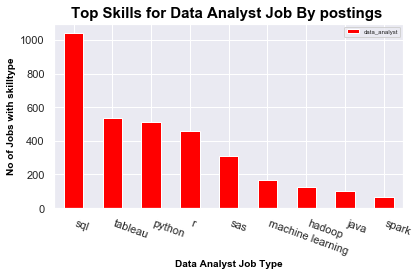

<Figure size 432x288 with 0 Axes>

In [5]:
sns.set()

job_df_Skills_reorg_DA.plot(kind='bar',colormap='prism')
#plt.xticks(rotation=20,ha='right')
plt.xticks(rotation=-20,ha='left')
#plt.ylim(0, job_df_group_DA_df["data_analyst"].max()+500)
plt.legend(loc='best',prop={'size': 6})
plt.title("Top Skills for Data Analyst Job By postings ",size=15,color='Black',fontweight="bold")
plt.xlabel("Data Analyst Job Type",size=10,color='Black',fontweight="bold")
plt.ylabel("No of Jobs with skilltype",size=10,color='Black',fontweight="bold")
plt.tight_layout()
plt.show()
plt.savefig("Top Skills for Data Analyst Job ")


In Data Analyst Job Type- SQL ,Tableau and Other related Skills 

In [6]:
job_df_group_DE=job_df.groupby("Job_Type").sum()
job_df_group_DE
DE_df = job_df.loc[job_df["Job_Type"] == "data_engineer", :]
DE_df.head()
job_df_group_DE=DE_df.groupby("Job_Type").sum()
job_df_group_DE_df=job_df_group_DE[["python","sql", "hadoop", "spark", "java","machine learning","r", "tableau", "sas"
       ]]

job_df_Skills_reorg_DE=pd.pivot_table(job_df_group_DE_df, columns='data_engineer', aggfunc=sum, fill_value=0)


job_df_Skills_reorg_DE=job_df_Skills_reorg_DE.sort_values(by="data_engineer",ascending=False)
job_df_Skills_reorg_DE

job_df_Skills_reorg_DE

,data_engineer
python,901
sql,867
hadoop,761
spark,719
java,704
machine learning,289
r,228
tableau,214
sas,67


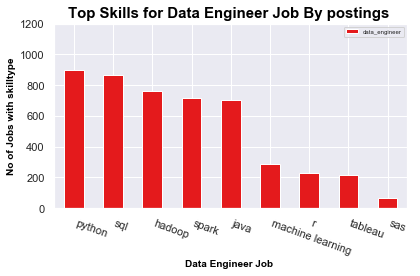

<Figure size 432x288 with 0 Axes>

In [7]:
sns.set()
job_df_Skills_reorg_DE.plot(kind='bar',colormap='Set1')
plt.xticks(rotation=-20,ha='left')
plt.ylim(0, 1200)
plt.legend(loc='best',prop={'size': 6})
plt.title("Top Skills for Data Engineer Job By postings ",size=15,color='Black',fontweight="bold")
plt.xlabel("Data Engineer Job ",size=10,color='Black',fontweight="bold")
plt.ylabel("No of Jobs with skilltype",size=10,color='Black',fontweight="bold")
plt.tight_layout()
plt.show()
plt.savefig("Top Skills for Data Engineer Job")


In Data Engineer -Python,SQL ,Hadoop ,Spark and Other related Skills 

In [8]:
job_df_group_DS=job_df.groupby("Job_Type").sum()
job_df_group_DS
DS_df = job_df.loc[job_df["Job_Type"] == "data_scientist", :]
DS_df.head()
job_df_group_DS=DS_df.groupby("Job_Type").sum()
job_df_group_DS_df=job_df_group_DS[["python","machine learning","r","sql", "hadoop", "spark", "java",  "sas","tableau"
       ]]


job_df_Skills_reorg_DS=pd.pivot_table(job_df_group_DS_df, columns='data_scientist', aggfunc=sum, fill_value=0)


job_df_Skills_reorg_DS=job_df_Skills_reorg_DS.sort_values(by="data_scientist",ascending=False)


job_df_Skills_reorg_DS


,data_scientist
python,1912
machine learning,1842
r,1550
sql,1193
hadoop,827
spark,745
java,675
sas,564
tableau,484


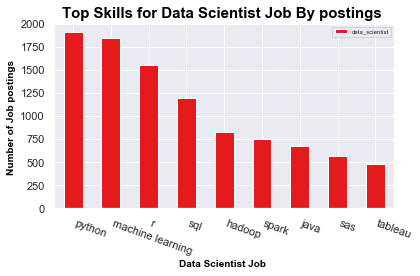

<Figure size 432x288 with 0 Axes>

In [9]:
sns.set()
job_df_Skills_reorg_DS.plot(kind='bar',colormap='Set1')

plt.xticks(rotation=-20,ha='left')
plt.ylim(0, 2000)
plt.legend(loc='best',prop={'size': 6})
plt.title("Top Skills for Data Scientist Job By postings ",size=15,color='Black',fontweight="bold")
plt.xlabel("Data Scientist Job ",size=10,color='Black',fontweight="bold")
plt.ylabel("Number of Job postings ",size=10,color='Black',fontweight="bold")
plt.tight_layout()
plt.show()
plt.savefig("Top Skills for Data Scientist Job")


In [10]:
job_df_group_reorg=job_df_group[["python","sql","machine learning","r", "hadoop", "tableau", "sas", "spark", "java",
       "Others"]]
job_df_group_reorg

job_df_Skills_reorg_Data=pd.pivot_table(job_df_group_reorg, columns='', aggfunc=sum, fill_value=0)

job_df_Skills_reorg_Data

,data_analyst,data_engineer,data_scientist
Others,1462,1338,2352
hadoop,126,761,827
java,101,704,675
machine learning,166,289,1842
python,512,901,1912
r,456,228,1550
sas,310,67,564
spark,67,719,745
sql,1044,867,1193
tableau,538,214,484


In Data Scientist -Python,Machine Learning , R and Other related Skills


In [11]:
job_df_group

,Unnamed: 0,No_of_Skills,No_of_Reviews,No_of_Stars,Date_Since_Posted,python,sql,machine learning,r,hadoop,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
,,,,,,,,,,,,,,,,,,,,,
data_analyst,6166127,8052,3606928.0,5824.399980,37356.0,512,1044,166,456,126,...,55,48,46,625,180,162,145,163,72,477
data_engineer,6929475,14948,3511154.0,4343.599995,29763.0,901,867,289,228,761,...,20,24,38,324,168,149,141,61,67,307
data_scientist,3232153,21598,13373953.0,8110.200006,57858.0,1912,1193,1842,1550,827,...,94,68,55,674,385,336,173,115,88,637


# Top 10 companies having openings Data Jobs

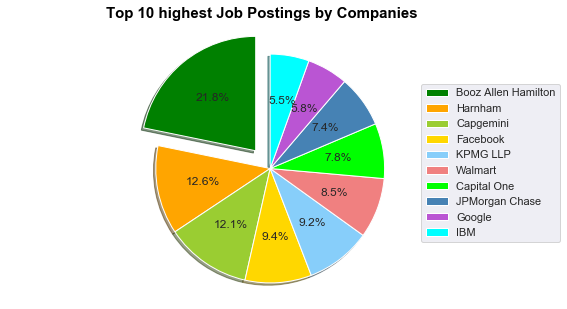

<Figure size 432x288 with 0 Axes>

In [12]:
comp_count  = job_df['Company'].value_counts()
comp_count = comp_count[:10,]
plt.figure(figsize=(9,5))

explode=(0.2,0,0,0,0,0,0,0,0,0)
colors = ['green','orange','yellowgreen', 'gold', 'lightskyblue', 'lightcoral','Lime','steelblue','mediumorchid','aqua']
plt.pie(comp_count.values,explode=explode, labels=None, autopct="%1.1f%%",colors=colors, shadow=True, startangle=90,labeldistance=1.1)
plt.legend( labels=comp_count.index,loc='upper right', bbox_to_anchor=(1.1, 0.8))
plt.title("Top 10 highest Job Postings by Companies ",size=15,color='Black',fontweight="bold")

plt.axis('equal')
plt.show()
plt.savefig("Top 10 highest Job Postings by Companies")


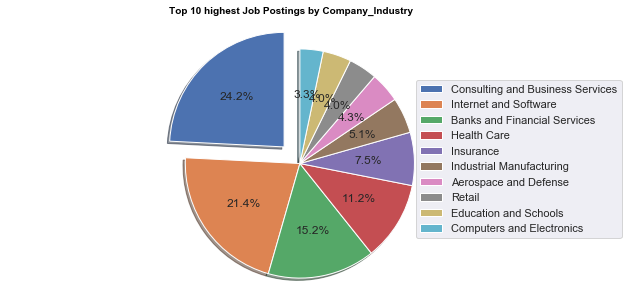

In [13]:
total_job_type = len(job_df['Job_Type'])
total_job_type

jobPostings_df = job_df.loc[:, ['Company_Industry', 'Company', 'Job_Type']]
jobPostings_df
jobPostingsbyCompanygroupby = jobPostings_df.groupby(['Company_Industry']).count()["Job_Type"]
jobPostingsbyCompanygroupby

jobPostingsbyCompany_table = pd.DataFrame({ "Job_Type_count" : jobPostingsbyCompanygroupby, "Job_Type_count_percent" : (jobPostingsbyCompanygroupby/total_job_type)*100 })
jobPostingsbyCompany_table = jobPostingsbyCompany_table.sort_values("Job_Type_count", ascending=False)
jobPostingsbyCompany_table.head(10)
comp1_count  = job_df['Company_Industry'].value_counts()
comp1_count = comp1_count[:10,]
plt.figure(figsize=(10,5))

explode=(0.2,0,0,0,0,0,0,0,0,0)
plt.pie(comp1_count.values,explode=explode, labels=None, autopct="%1.1f%%", shadow=True, startangle=90,labeldistance=1.5)
plt.legend( labels=comp1_count.index,loc='upper right', bbox_to_anchor=(1.1, 0.8))
plt.title("Top 10 highest Job Postings by Company_Industry ",size=10,color='Black',fontweight="bold")

plt.axis('equal')
plt.savefig("Top 10 highest Job Postings by Company_Industry")

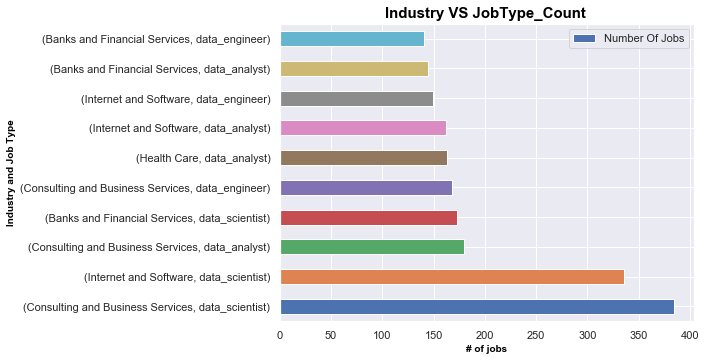

In [14]:
jobPostingsbyCompanygroupby1 = jobPostings_df.groupby(['Company_Industry', 'Job_Type']).count()['Company']
jobPostingsbyCompany_table1 = pd.DataFrame({'Company_Industry_job':jobPostingsbyCompanygroupby1.index, 'Number Of Jobs':jobPostingsbyCompanygroupby1.values})

jobPostingsbyCompany_table12=jobPostingsbyCompany_table1.join(jobPostingsbyCompany_table1['Company_Industry_job'].str.split(',', 1, expand=True).rename(columns={0:'Company_Industry', 1:'Job'}))

jobPostingsbyCompany_table1 = jobPostingsbyCompany_table1.sort_values("Number Of Jobs", ascending=False)


sns.set()
colors = ["r","b","g","y"]
jobPostingsbyCompany_table1.head(10).plot.barh(x="Company_Industry_job", y ="Number Of Jobs",  figsize=(10,5))
plt.legend()

plt.title("Industry VS JobType_Count ",size=15,color='Black',fontweight="bold")
plt.tight_layout()

plt.xlabel("# of jobs",size=10,color='Black',fontweight="bold")
plt.ylabel("Industry and Job Type",size=10,color='Black',fontweight="bold")
plt.savefig("Industry VS JobType_Count")

In [15]:
data_scientist = job_df[job_df["Job_Type"] == "data_scientist"]
data_engineer = job_df[job_df["Job_Type"] == "data_engineer"]
data_analyst = job_df[job_df["Job_Type"] == "data_analyst"]


data_scientist_count = data_scientist.groupby(["Company_Industry"]).count()["Unnamed: 0"]
data_scientist_avg_skill = data_scientist.groupby(["Company_Industry"]).mean()["No_of_Skills"]
data_scientist_industry = data_scientist.groupby(["Company_Industry"]).count()["Company"]

data_engineer_count = data_engineer.groupby(["Company_Industry"]).count()["Unnamed: 0"]
data_engineer_avg_skill = data_engineer.groupby(["Company_Industry"]).mean()["No_of_Skills"]
data_engineer_industry = data_engineer.groupby(["Company_Industry"]).count()["Company"]

data_analyst_count = data_analyst.groupby(["Company_Industry"]).count()["Unnamed: 0"]
data_analyst_avg_skill = data_analyst.groupby(["Company_Industry"]).mean()["No_of_Skills"]
data_analyst_industry = data_analyst.groupby(["Company_Industry"]).count()["Company"]







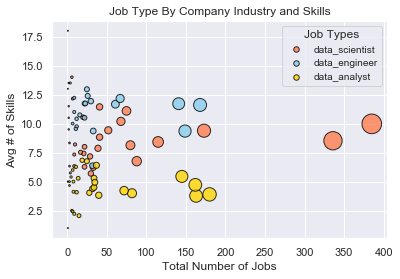

In [16]:
plt.scatter(data_scientist_count, 
            data_scientist_avg_skill, 
            s=data_scientist_industry, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="data_scientist")

plt.scatter(data_engineer_count, 
            data_engineer_avg_skill, 
            s=data_engineer_industry, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="data_engineer")

plt.scatter(data_analyst_count, 
            data_analyst_avg_skill, 
            s=data_analyst_industry, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="data_analyst", clip_on=True)


# Incorporate the other graph properties
plt.title("Job Type By Company Industry and Skills")
plt.ylabel("Avg # of Skills")
plt.xlabel("Total Number of Jobs")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Job Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
#plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# # Save Figure
plt.savefig("Avg Skills by Job Type and Total Number of Jobs.png")

# # Show plot
plt.show()



In [17]:
#TTest

Mean_DS = data_scientist["No_of_Skills"].mean()
Mean_DS
Mean_DE = data_engineer["No_of_Skills"].mean()
Mean_DE
Mean_DA = data_analyst["No_of_Skills"].mean()
Mean_DA

stats.ttest_ind(data_engineer.No_of_Skills,data_scientist.No_of_Skills ,equal_var = False)

Ttest_indResult(statistic=13.806280508740034, pvalue=6.957707966292973e-42)

In [18]:
#Anova
group1 = data_analyst["No_of_Skills"]
group2 = data_engineer["No_of_Skills"]
group3 = data_scientist["No_of_Skills"]

stats.f_oneway(group1,group2,group3)

F_onewayResult(statistic=837.8092532158969, pvalue=8.677e-320)

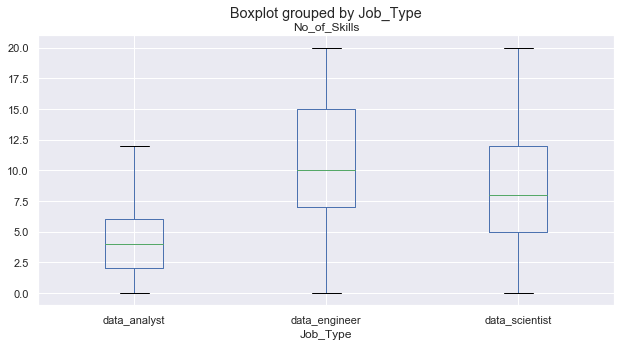

In [19]:
#JOB type vs  Nos of skills Anova

job2_df = job_df[["Job_Type", "No_of_Skills"]]
job2_df.boxplot("No_of_Skills", by="Job_Type", figsize=(10, 5),showfliers=False)


In [20]:
jobPostings_df_type = job_df[[ 'Job_Type','python', 'sql', 'r','sas','machine learning', 'hadoop']]
jobPostings_df_type.head()

,Job_Type,python,sql,r,sas,machine learning,hadoop
0,data_scientist,0,1,0,0,0,0
1,data_scientist,1,1,1,1,1,0
2,data_scientist,1,1,1,1,0,0
3,data_scientist,0,0,0,0,0,0
4,data_scientist,0,0,1,0,0,0


In [21]:
#TTEST Skills
data_scientist11 = jobPostings_df_type[jobPostings_df_type["Job_Type"] == "data_scientist"]
data_engineer11 = jobPostings_df_type[jobPostings_df_type["Job_Type"] == "data_engineer"]
data_analyst11 = jobPostings_df_type[jobPostings_df_type["Job_Type"] == "data_analyst"]

Mean_python = data_scientist11["python"].mean()
Mean_python
Mean_sql = data_scientist11["machine learning"].mean()
Mean_sql
Mean_r = data_scientist11["r"].mean()
Mean_r

stats.ttest_ind(data_scientist11.python,data_scientist11.hadoop ,equal_var = False)

Ttest_indResult(statistic=33.760035810346494, pvalue=1.7847523666117827e-225)

In [22]:
#Anova for skill type
group1 = data_scientist11["python"]
group2 = data_scientist11["hadoop"]
group3 = data_scientist11["r"]

stats.f_oneway(group1,group2,group3)

F_onewayResult(statistic=558.7841341889582, pvalue=3.4567558345905093e-227)

In [23]:
job_ct=len(job_df)
job_ct

5715

In [24]:
job_df_State_reorg=job_df_group[['CA', 'NY', 'VA', 'TX', 'MA']]
job_df_State_reorg.sum()
job_df_State_reorg=pd.pivot_table(job_df_State_reorg, columns='', aggfunc=sum, fill_value=0)
job_df_State_reorg=job_df_State_reorg.sort_values(by="data_analyst",ascending=False)
job_df_State_reorg

,data_analyst,data_engineer,data_scientist
CA,376,296,723
NY,230,118,253
TX,117,76,136
MA,86,52,133
VA,85,72,177


In [25]:
job_df_State_reorg.head

Top_count_State_ct_sort_DS = job_df_State_reorg.sort_values(by="data_scientist",ascending=False)
Top_count_State_ct_sort_DataScientist=Top_count_State_ct_sort_DS[["data_scientist"]]

Top_count_State_ct_sort_DA = job_df_State_reorg.sort_values(by="data_analyst",ascending=False)
Top_count_State_ct_sort_DataAnalyst=Top_count_State_ct_sort_DA[["data_analyst"]]
Top_count_State_ct_sort_DataAnalyst

Top_count_State_ct_sort_DE = job_df_State_reorg.sort_values(by="data_engineer",ascending=False)
Top_count_State_ct_sort_DE=Top_count_State_ct_sort_DE[["data_engineer"]]
Top_count_State_ct_sort_DE

,data_engineer
CA,296
NY,118
TX,76
VA,72
MA,52


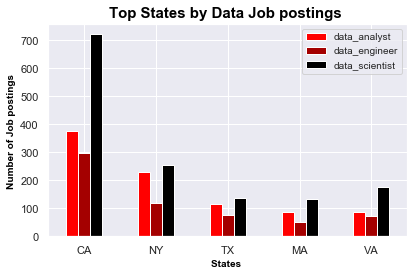

<Figure size 432x288 with 0 Axes>

In [26]:

sns.set()
job_df_State_reorg.plot(kind='bar',colormap='flag')

plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.legend(loc='best',prop={'size': 10})
plt.title("Top States by Data Job postings ",size=15,color='Black',fontweight="bold")
plt.xlabel("States ",size=10,color='Black',fontweight="bold")
plt.ylabel("Number of Job postings ",size=10,color='Black',fontweight="bold")
plt.tight_layout()
plt.show()
plt.savefig("State postings")


In [27]:
job_df_State_reorg=job_df_group[['CA', 'NY', 'VA', 'TX', 'MA']]
job_df_State_reorg


,CA,NY,VA,TX,MA
,,,,,
data_analyst,376,230,85,117,86
data_engineer,296,118,72,76,52
data_scientist,723,253,177,136,133


In [28]:

Top_count_State = job_df[['CA', 'NY', 'VA', 'TX', 'MA', 'IL', 'WA', 'MD', 'DC', 'NC']]
Top_count_State_ct=Top_count_State[Top_count_State[:]==1].count()

Top_count_State_ct
Top_count_State_ct_sort = Top_count_State_ct.sort_values( ascending=False)

In [29]:
job_df_Skills_reorg=job_df_group[["python","machine learning","r","sql", "hadoop", "spark", "java",  "sas","tableau"
       ]]
job_df_Skills_reorg.sum()


job_df_Skills_reorg

,python,machine learning,r,sql,hadoop,spark,java,sas,tableau
,,,,,,,,,
data_analyst,512,166,456,1044,126,67,101,310,538
data_engineer,901,289,228,867,761,719,704,67,214
data_scientist,1912,1842,1550,1193,827,745,675,564,484


In [30]:

job_df_Skills_reorg_pivot=pd.pivot_table(job_df_Skills_reorg, columns='', aggfunc=sum, fill_value=0)
job_df_Skills_reorg_pivot=job_df_Skills_reorg_pivot.sort_values(by="data_analyst",ascending=False)
job_df_Skills_reorg_pivot

,data_analyst,data_engineer,data_scientist
sql,1044,867,1193
tableau,538,214,484
python,512,901,1912
r,456,228,1550
sas,310,67,564
machine learning,166,289,1842
hadoop,126,761,827
java,101,704,675
spark,67,719,745


In [31]:
job_df_Skills_reorg_pivot.head

Top_count_Skill_ct_sort_DS = job_df_Skills_reorg_pivot.sort_values(by="data_scientist",ascending=False)
Top_count_Skill_ct_sort_DataScientist=Top_count_Skill_ct_sort_DS[["data_scientist"]]

Top_count_Skill_ct_sort_DA = job_df_Skills_reorg_pivot.sort_values(by="data_analyst",ascending=False)
Top_count_Skill_ct_sort_DataAnalyst=Top_count_Skill_ct_sort_DA[["data_analyst"]]
Top_count_Skill_ct_sort_DataAnalyst

Top_count_Skill_ct_sort_DE = job_df_Skills_reorg_pivot.sort_values(by="data_engineer",ascending=False)
Top_count_Skill_ct_sort_DE=Top_count_Skill_ct_sort_DE[["data_engineer"]]
Top_count_Skill_ct_sort_DE

,data_engineer
python,901
sql,867
hadoop,761
spark,719
java,704
machine learning,289
r,228
tableau,214
sas,67


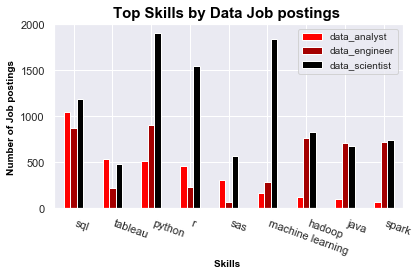

<Figure size 432x288 with 0 Axes>

In [32]:
sns.set()
job_df_Skills_reorg_pivot.plot(kind='bar',colormap='flag')

plt.xticks(rotation=-20,ha="left")

plt.legend(loc='best',prop={'size': 10})
plt.title("Top Skills by Data Job postings ",size=15,color='Black',fontweight="bold")
plt.xlabel("Skills ",size=10,color='Black',fontweight="bold")
plt.ylabel("Number of Job postings ",size=10,color='Black',fontweight="bold")
plt.tight_layout()
plt.show()
plt.savefig("Skills postings")


# Company Satisfaction vs Est. Salary Range


In [38]:
# drop all the null values for No_of_Stars, Queried_Salary do not have nulls
dropna_stars_df = job_df.dropna(subset=['No_of_Stars'], how='all')
dropna_stars_df

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0
5,5,Data Scientist - Entry to Experienced Level,https://www.indeed.com/rc/clk?jk=835a2db493898...,<80000,data_scientist,"['AI', 'Quantitative Analysis', 'Data Mining',...",6,National Security Agency,173.0,4.3,...,1,0,0,0,0,0,0,0,0,0
6,6,Geospatial Data Scientist,https://www.indeed.com/rc/clk?jk=6255c4e94a7ef...,<80000,data_scientist,"['Statistical Software', 'Machine Learning', '...",10,NYC Careers,30.0,3.8,...,0,0,0,0,0,0,0,0,0,1
8,8,Bioinformatics Data Scientist,https://www.indeed.com/rc/clk?jk=a6e45b6264f26...,<80000,data_scientist,"['Linux', 'R', 'C/C++', 'Python']",4,University of Idaho,233.0,4.2,...,0,0,0,1,0,0,0,0,0,1
9,9,Data Scientist,https://www.indeed.com/rc/clk?jk=56090c965b57d...,<80000,data_scientist,"['JavaScript', 'Data Mining', 'TS/SCI Clearanc...",6,usajobs.gov,4227.0,4.3,...,0,0,0,1,0,0,0,0,0,1
10,10,Data Scientist,https://www.indeed.com/rc/clk?jk=8c8963cb38cd4...,<80000,data_scientist,"['Machine Learning', 'R', 'SPSS', 'Data Analys...",8,The University of Pittsburgh,541.0,4.2,...,0,0,0,1,0,0,0,0,0,1
11,11,Data Scientist,https://www.indeed.com/rc/clk?jk=dffcee22fbc26...,<80000,data_scientist,"['Machine Learning', 'R', 'SPSS', 'Data Analys...",8,The University of Pittsburgh,541.0,4.2,...,0,0,0,1,0,0,0,0,0,1


In [39]:
# categorize by job type
ds_jobs = dropna_stars_df[dropna_stars_df['Job_Type']=='data_scientist']
da_jobs = dropna_stars_df[dropna_stars_df['Job_Type']=='data_analyst']
de_jobs = dropna_stars_df[dropna_stars_df['Job_Type']=='data_engineer']

# categorize by salary
ds_jobs_under_80 = ds_jobs[ds_jobs['Queried_Salary']== '<80000']
ds_jobs_80_99 = ds_jobs[ds_jobs['Queried_Salary']== '80000-99999']
ds_jobs_100_119 = ds_jobs[ds_jobs['Queried_Salary']== '100000-119999']
ds_jobs_120_139 = ds_jobs[ds_jobs['Queried_Salary']== '120000-139999']
ds_jobs_140_159 = ds_jobs[ds_jobs['Queried_Salary']== '140000-159999']
ds_jobs_over_160 = ds_jobs[ds_jobs['Queried_Salary']== '>160000']

da_jobs_under_80 = da_jobs[da_jobs['Queried_Salary']== '<80000']
da_jobs_80_99 = da_jobs[da_jobs['Queried_Salary']== '80000-99999']
da_jobs_100_119 = da_jobs[da_jobs['Queried_Salary']== '100000-119999']
da_jobs_120_139 = da_jobs[da_jobs['Queried_Salary']== '120000-139999']
da_jobs_140_159 = da_jobs[da_jobs['Queried_Salary']== '140000-159999']
da_jobs_over_160 = da_jobs[da_jobs['Queried_Salary']== '>160000']

de_jobs_under_80 = de_jobs[de_jobs['Queried_Salary']== '<80000']
de_jobs_80_99 = de_jobs[de_jobs['Queried_Salary']== '80000-99999']
de_jobs_100_119 = de_jobs[de_jobs['Queried_Salary']== '100000-119999']
de_jobs_120_139 = de_jobs[de_jobs['Queried_Salary']== '120000-139999']
de_jobs_140_159 = de_jobs[de_jobs['Queried_Salary']== '140000-159999']
de_jobs_over_160 = de_jobs[de_jobs['Queried_Salary']== '>160000']

# average the star ratings
ds_jobs_under_80_stars = ds_jobs_under_80.loc[:,"No_of_Stars"].mean()
ds_jobs_80_99_stars = ds_jobs_80_99.loc[:,"No_of_Stars"].mean()
ds_jobs_100_119_stars = ds_jobs_100_119.loc[:,"No_of_Stars"].mean()
ds_jobs_120_139_stars = ds_jobs_120_139.loc[:,"No_of_Stars"].mean()
ds_jobs_140_159_stars = ds_jobs_140_159.loc[:,"No_of_Stars"].mean()
ds_jobs_over_160_stars = ds_jobs_over_160.loc[:,"No_of_Stars"].mean()

da_jobs_under_80_stars = da_jobs_under_80.loc[:,"No_of_Stars"].mean()
da_jobs_80_99_stars = da_jobs_80_99.loc[:,"No_of_Stars"].mean()
da_jobs_100_119_stars = da_jobs_100_119.loc[:,"No_of_Stars"].mean()
da_jobs_120_139_stars = da_jobs_120_139.loc[:,"No_of_Stars"].mean()
da_jobs_140_159_stars = da_jobs_140_159.loc[:,"No_of_Stars"].mean()
da_jobs_over_160_stars = da_jobs_over_160.loc[:,"No_of_Stars"].mean()

de_jobs_under_80_stars = de_jobs_under_80.loc[:,"No_of_Stars"].mean()
de_jobs_80_99_stars = de_jobs_80_99.loc[:,"No_of_Stars"].mean()
de_jobs_100_119_stars = de_jobs_100_119.loc[:,"No_of_Stars"].mean()
de_jobs_120_139_stars = de_jobs_120_139.loc[:,"No_of_Stars"].mean()
de_jobs_140_159_stars = de_jobs_140_159.loc[:,"No_of_Stars"].mean()
de_jobs_over_160_stars = de_jobs_over_160.loc[:,"No_of_Stars"].mean()

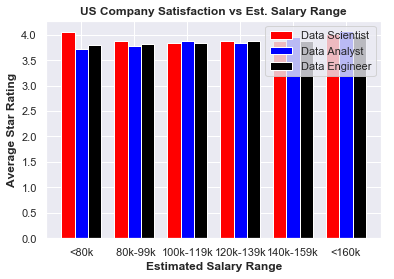

In [43]:
ds_stars = (ds_jobs_under_80_stars, 
           ds_jobs_80_99_stars,
           ds_jobs_100_119_stars,
           ds_jobs_120_139_stars,
           ds_jobs_140_159_stars,
           ds_jobs_over_160_stars)

da_stars = (da_jobs_under_80_stars,
           da_jobs_80_99_stars,
           da_jobs_100_119_stars,
           da_jobs_120_139_stars,
           da_jobs_140_159_stars,
           da_jobs_over_160_stars)
de_stars = (de_jobs_under_80_stars,
           de_jobs_80_99_stars,
           de_jobs_100_119_stars,
           de_jobs_120_139_stars,
           de_jobs_140_159_stars,
           de_jobs_over_160_stars)
# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(ds_stars))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, ds_stars, color='#ff0000', width=barWidth, edgecolor='white', label='Data Scientist')
plt.bar(r2, da_stars, color='#0000ff', width=barWidth, edgecolor='white', label='Data Analyst')
plt.bar(r3, de_stars, color='#000000', width=barWidth, edgecolor='white', label='Data Engineer')
 
# Add xticks on the middle of the group bars
plt.xlabel('Estimated Salary Range', fontweight='bold')
plt.ylabel('Average Star Rating', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(ds_stars))], ['<80k', ' 80k-99k', '100k-119k',
                                                          '120k-139k', '140k-159k', '<160k'])
plt.title('US Company Satisfaction vs Est. Salary Range', fontweight='bold')
 
# Create legend & Show graphic
plt.legend(loc='upper right')
plt.show()


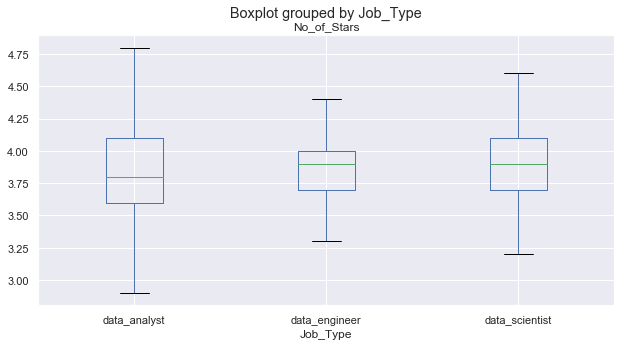

In [44]:
dropna_stars_df.boxplot("No_of_Stars", by="Job_Type", figsize=(10, 5),showfliers=False)

In [46]:
# CA only drop all the null values for No_of_Stars, Queried_Salary do not have nulls
dropna_stars_df_CA = job_df[job_df['Location']=='CA'].dropna(subset=['No_of_Stars'], how='all')
dropna_stars_df_CA

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
29,29,Data Analysis & Machine Learning Postdoctoral ...,https://www.indeed.com/rc/clk?jk=fbe8ba212a66f...,<80000,data_scientist,"['TensorFlow', 'Machine Learning', 'Git', 'Pyt...",5,Lawrence Livermore National Laboratory,111.0,4.3,...,0,0,0,0,0,0,0,0,0,1
30,30,Applied Machine Learning Scientist - Digital I...,https://www.indeed.com/rc/clk?jk=25c78fd15a122...,<80000,data_scientist,"['TensorFlow', 'JavaScript', 'React', 'Data Mi...",8,Adobe,484.0,4.3,...,0,0,0,0,0,1,0,0,0,0
32,32,"Google AI Resident, 2019 Start (Fixed-Term Emp...",https://www.indeed.com/rc/clk?jk=83bb741f685c3...,<80000,data_scientist,NaN,0,Google,2641.0,4.3,...,0,0,0,0,0,1,0,0,0,0
35,35,Machine Learning Intern (Summer 2019),https://www.indeed.com/rc/clk?jk=e84451fb3b44e...,<80000,data_scientist,"['Splunk', 'Data Mining', 'Machine Learning', ...",4,Splunk,30.0,4.3,...,0,0,0,0,0,1,0,0,0,0
41,41,Machine Learning,https://www.indeed.com/rc/clk?jk=33f4f5ff14420...,<80000,data_scientist,"['Big Data', 'Natural Language Processing', 'S...",5,Twitter,63.0,3.9,...,0,0,0,0,0,1,0,0,0,0
42,42,Temporary Content Developer - Machine Learning,https://www.indeed.com/rc/clk?jk=d693f99164a06...,<80000,data_scientist,"['TensorFlow', 'Machine Learning', 'Python']",3,iD Tech,39.0,4.5,...,0,0,0,0,0,0,0,0,0,0
64,64,Data Scientist,https://www.indeed.com/rc/clk?jk=e43f40e73837d...,80000-99999,data_scientist,NaN,0,University of California San Francisco,282.0,4.2,...,0,0,0,0,0,0,0,0,0,1
88,88,Data Scientist,https://www.indeed.com/rc/clk?jk=52ec4b0d6a7bf...,80000-99999,data_scientist,"['Perl', 'Statisical Analysis', 'C/C++', 'Java...",6,Lawrence Berkeley National Laboratory,130.0,4.2,...,0,0,0,0,0,0,0,0,0,1
94,94,Intern - Data Scientist,https://www.indeed.com/rc/clk?jk=6c14cab0a5158...,80000-99999,data_scientist,"['JavaScript', 'Spark', 'Machine Learning', 'H...",5,Palo Alto Networks,56.0,4.1,...,0,0,0,0,0,1,0,0,0,0
122,122,Principal Deep Learning Data Scientist,https://www.indeed.com/rc/clk?jk=e3e93f5ba996b...,80000-99999,data_scientist,"['Machine Learning', 'Image Processing']",2,Teradata,145.0,3.8,...,0,0,0,0,0,1,0,0,0,0


In [47]:
# categorize by job type
ds_jobs_CA = dropna_stars_df_CA[dropna_stars_df_CA['Job_Type']=='data_scientist']
da_jobs_CA = dropna_stars_df_CA[dropna_stars_df_CA['Job_Type']=='data_analyst']
de_jobs_CA = dropna_stars_df_CA[dropna_stars_df_CA['Job_Type']=='data_engineer']

# categorize by salary
ds_jobs_CA_under_80 = ds_jobs_CA[ds_jobs_CA['Queried_Salary']== '<80000']
ds_jobs_CA_80_99 = ds_jobs_CA[ds_jobs_CA['Queried_Salary']== '80000-99999']
ds_jobs_CA_100_119 = ds_jobs_CA[ds_jobs_CA['Queried_Salary']== '100000-119999']
ds_jobs_CA_120_139 = ds_jobs_CA[ds_jobs_CA['Queried_Salary']== '120000-139999']
ds_jobs_CA_140_159 = ds_jobs_CA[ds_jobs_CA['Queried_Salary']== '140000-159999']
ds_jobs_CA_over_160 = ds_jobs_CA[ds_jobs_CA['Queried_Salary']== '>160000']

da_jobs_CA_under_80 = da_jobs_CA[da_jobs_CA['Queried_Salary']== '<80000']
da_jobs_CA_80_99 = da_jobs_CA[da_jobs_CA['Queried_Salary']== '80000-99999']
da_jobs_CA_100_119 = da_jobs_CA[da_jobs_CA['Queried_Salary']== '100000-119999']
da_jobs_CA_120_139 = da_jobs_CA[da_jobs_CA['Queried_Salary']== '120000-139999']
da_jobs_CA_140_159 = da_jobs_CA[da_jobs_CA['Queried_Salary']== '140000-159999']
da_jobs_CA_over_160 = da_jobs_CA[da_jobs_CA['Queried_Salary']== '>160000']

de_jobs_CA_under_80 = de_jobs_CA[de_jobs_CA['Queried_Salary']== '<80000']
de_jobs_CA_80_99 = de_jobs_CA[de_jobs_CA['Queried_Salary']== '80000-99999']
de_jobs_CA_100_119 = de_jobs_CA[de_jobs_CA['Queried_Salary']== '100000-119999']
de_jobs_CA_120_139 = de_jobs_CA[de_jobs_CA['Queried_Salary']== '120000-139999']
de_jobs_CA_140_159 = de_jobs_CA[de_jobs_CA['Queried_Salary']== '140000-159999']
de_jobs_CA_over_160 = de_jobs_CA[de_jobs_CA['Queried_Salary']== '>160000']

# average the star ratings
ds_jobs_CA_under_80_stars = ds_jobs_CA_under_80.loc[:,"No_of_Stars"].mean()
ds_jobs_CA_80_99_stars = ds_jobs_CA_80_99.loc[:,"No_of_Stars"].mean()
ds_jobs_CA_100_119_stars = ds_jobs_CA_100_119.loc[:,"No_of_Stars"].mean()
ds_jobs_CA_120_139_stars = ds_jobs_CA_120_139.loc[:,"No_of_Stars"].mean()
ds_jobs_CA_140_159_stars = ds_jobs_CA_140_159.loc[:,"No_of_Stars"].mean()
ds_jobs_CA_over_160_stars = ds_jobs_CA_over_160.loc[:,"No_of_Stars"].mean()

da_jobs_CA_under_80_stars = da_jobs_CA_under_80.loc[:,"No_of_Stars"].mean()
da_jobs_CA_80_99_stars = da_jobs_CA_80_99.loc[:,"No_of_Stars"].mean()
da_jobs_CA_100_119_stars = da_jobs_CA_100_119.loc[:,"No_of_Stars"].mean()
da_jobs_CA_120_139_stars = da_jobs_CA_120_139.loc[:,"No_of_Stars"].mean()
da_jobs_CA_140_159_stars = da_jobs_CA_140_159.loc[:,"No_of_Stars"].mean()
da_jobs_CA_over_160_stars = da_jobs_CA_over_160.loc[:,"No_of_Stars"].mean()

de_jobs_CA_under_80_stars = de_jobs_CA_under_80.loc[:,"No_of_Stars"].mean()
de_jobs_CA_80_99_stars = de_jobs_CA_80_99.loc[:,"No_of_Stars"].mean()
de_jobs_CA_100_119_stars = de_jobs_CA_100_119.loc[:,"No_of_Stars"].mean()
de_jobs_CA_120_139_stars = de_jobs_CA_120_139.loc[:,"No_of_Stars"].mean()
de_jobs_CA_140_159_stars = de_jobs_CA_140_159.loc[:,"No_of_Stars"].mean()
de_jobs_CA_over_160_stars = de_jobs_CA_over_160.loc[:,"No_of_Stars"].mean()



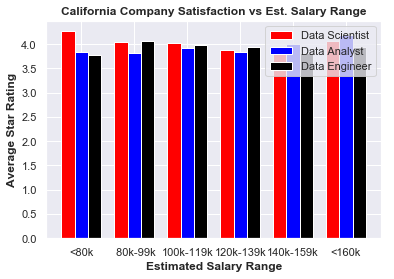

In [48]:
ds_stars_CA = (ds_jobs_CA_under_80_stars, 
           ds_jobs_CA_80_99_stars,
           ds_jobs_CA_100_119_stars,
           ds_jobs_CA_120_139_stars,
           ds_jobs_CA_140_159_stars,
           ds_jobs_CA_over_160_stars)

da_stars_CA = (da_jobs_CA_under_80_stars,
           da_jobs_CA_80_99_stars,
           da_jobs_CA_100_119_stars,
           da_jobs_CA_120_139_stars,
           da_jobs_CA_140_159_stars,
           da_jobs_CA_over_160_stars)
de_stars_CA = (de_jobs_CA_under_80_stars,
           de_jobs_CA_80_99_stars,
           de_jobs_CA_100_119_stars,
           de_jobs_CA_120_139_stars,
           de_jobs_CA_140_159_stars,
           de_jobs_CA_over_160_stars)
# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(ds_stars_CA))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, ds_stars_CA, color='#ff0000', width=barWidth, edgecolor='white', label='Data Scientist')
plt.bar(r2, da_stars_CA, color='#0000ff', width=barWidth, edgecolor='white', label='Data Analyst')
plt.bar(r3, de_stars_CA, color='#000000', width=barWidth, edgecolor='white', label='Data Engineer')
 
# Add xticks on the middle of the group bars
plt.xlabel('Estimated Salary Range', fontweight='bold')
plt.ylabel('Average Star Rating', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(ds_stars_CA))], ['<80k', ' 80k-99k', '100k-119k',
                                                          '120k-139k', '140k-159k', '<160k'])
plt.title('California Company Satisfaction vs Est. Salary Range', fontweight='bold')
 
# Create legend & Show graphic
plt.legend(loc='upper right')
plt.show()

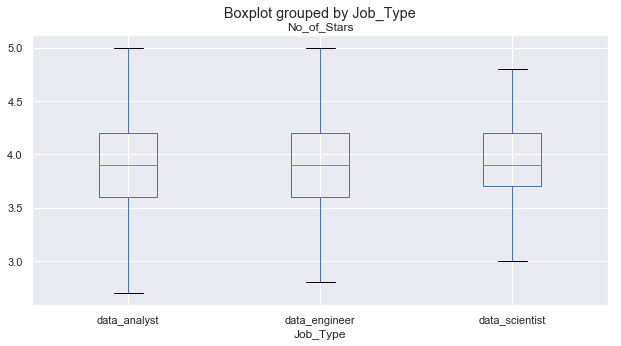

In [49]:
dropna_stars_df_CA.boxplot("No_of_Stars", by="Job_Type", figsize=(10, 5),showfliers=False)


In [50]:
grp_ds_stars_CA = ds_stars_CA
grp_da_stars_CA = da_stars_CA
grp_de_stars_CA = de_stars_CA

stat_grp_stars_CA=stats.f_oneway(grp_ds_stars_CA,grp_da_stars_CA,grp_de_stars_CA)
stat_grp_stars_CA

F_onewayResult(statistic=1.0125537492507857, pvalue=0.3868213818831571)

# Company Satisfaction vs # of Employees

In [51]:
# drop all the null values for No_of_Stars, Queried_Salary do not have nulls
dropna_stars_emp_df = job_df.dropna(subset=['No_of_Stars','Company_Employees'], how='all')
dropna_stars_emp_df

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0
5,5,Data Scientist - Entry to Experienced Level,https://www.indeed.com/rc/clk?jk=835a2db493898...,<80000,data_scientist,"['AI', 'Quantitative Analysis', 'Data Mining',...",6,National Security Agency,173.0,4.3,...,1,0,0,0,0,0,0,0,0,0
6,6,Geospatial Data Scientist,https://www.indeed.com/rc/clk?jk=6255c4e94a7ef...,<80000,data_scientist,"['Statistical Software', 'Machine Learning', '...",10,NYC Careers,30.0,3.8,...,0,0,0,0,0,0,0,0,0,1
8,8,Bioinformatics Data Scientist,https://www.indeed.com/rc/clk?jk=a6e45b6264f26...,<80000,data_scientist,"['Linux', 'R', 'C/C++', 'Python']",4,University of Idaho,233.0,4.2,...,0,0,0,1,0,0,0,0,0,1
9,9,Data Scientist,https://www.indeed.com/rc/clk?jk=56090c965b57d...,<80000,data_scientist,"['JavaScript', 'Data Mining', 'TS/SCI Clearanc...",6,usajobs.gov,4227.0,4.3,...,0,0,0,1,0,0,0,0,0,1
10,10,Data Scientist,https://www.indeed.com/rc/clk?jk=8c8963cb38cd4...,<80000,data_scientist,"['Machine Learning', 'R', 'SPSS', 'Data Analys...",8,The University of Pittsburgh,541.0,4.2,...,0,0,0,1,0,0,0,0,0,1
11,11,Data Scientist,https://www.indeed.com/rc/clk?jk=dffcee22fbc26...,<80000,data_scientist,"['Machine Learning', 'R', 'SPSS', 'Data Analys...",8,The University of Pittsburgh,541.0,4.2,...,0,0,0,1,0,0,0,0,0,1


In [52]:
ds_jobs_emp = dropna_stars_emp_df[dropna_stars_emp_df['Job_Type']=='data_scientist']
da_jobs_emp = dropna_stars_emp_df[dropna_stars_emp_df['Job_Type']=='data_analyst']
de_jobs_emp = dropna_stars_emp_df[dropna_stars_emp_df['Job_Type']=='data_engineer']

# categorize by # of employees
ds_jobs_emp_under_10K = ds_jobs_emp[ds_jobs_emp['Company_Employees']== 'Less than 10,000']
ds_jobs_emp_over_10K = ds_jobs_emp[ds_jobs_emp['Company_Employees']== '10,000+']

da_jobs_emp_under_10K = da_jobs_emp[da_jobs_emp['Company_Employees']== 'Less than 10,000']
da_jobs_emp_over_10K = da_jobs_emp[da_jobs_emp['Company_Employees']== '10,000+']

de_jobs_emp_under_10K = de_jobs_emp[de_jobs_emp['Company_Employees']== 'Less than 10,000']
de_jobs_emp_over_10K = de_jobs_emp[de_jobs_emp['Company_Employees']== '10,000+']

# average the star ratings
ds_jobs_emp_under_10K_stars = ds_jobs_emp_under_10K.loc[:,"No_of_Stars"].mean()
ds_jobs_emp_over_10K_stars = ds_jobs_emp_over_10K.loc[:,"No_of_Stars"].mean()

da_jobs_emp_under_10K_stars = da_jobs_emp_under_10K.loc[:,"No_of_Stars"].mean()
da_jobs_emp_over_10K_stars = da_jobs_emp_over_10K.loc[:,"No_of_Stars"].mean()

de_jobs_emp_under_10K_stars = de_jobs_emp_under_10K.loc[:,"No_of_Stars"].mean()
de_jobs_emp_over_10K_stars = de_jobs_emp_over_10K.loc[:,"No_of_Stars"].mean()

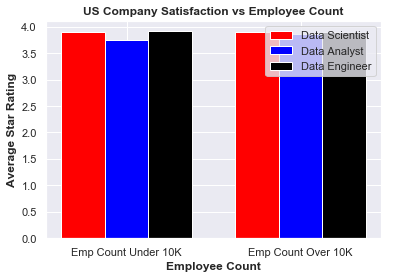

In [53]:
ds_emp_stars = (ds_jobs_emp_under_10K_stars, ds_jobs_emp_over_10K_stars)
da_emp_stars = (da_jobs_emp_under_10K_stars, da_jobs_emp_over_10K_stars)
de_emp_stars = (de_jobs_emp_under_10K_stars, de_jobs_emp_over_10K_stars)

# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(ds_emp_stars))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, ds_emp_stars, color='#ff0000', width=barWidth, edgecolor='white', label='Data Scientist')
plt.bar(r2, da_emp_stars, color='#0000ff', width=barWidth, edgecolor='white', label='Data Analyst')
plt.bar(r3, de_emp_stars, color='#000000', width=barWidth, edgecolor='white', label='Data Engineer')
 
# Add xticks on the middle of the group bars
plt.xlabel('Employee Count', fontweight='bold')
plt.ylabel('Average Star Rating', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(ds_emp_stars))], ['Emp Count Under 10K', 'Emp Count Over 10K'])
plt.title('US Company Satisfaction vs Employee Count', fontweight='bold')
 
# Create legend & Show graphic
plt.legend(loc='upper right')
plt.show()

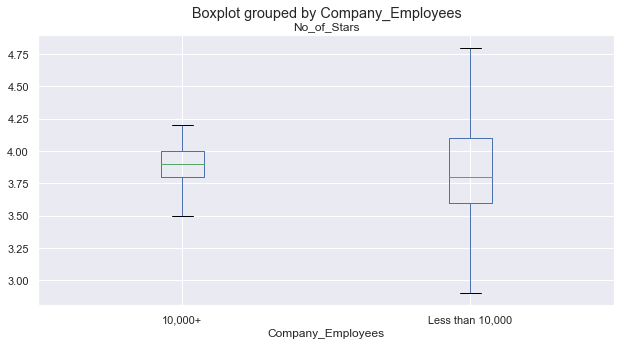

In [54]:
dropna_stars_emp_df.boxplot("No_of_Stars", by="Company_Employees", figsize=(10, 5),showfliers=False)

In [55]:
grp_ds_emp_stars = ds_emp_stars
grp_da_emp_stars = da_emp_stars
grp_de_emp_stars = de_emp_stars

stat_grp_emp_stars=stats.f_oneway(grp_ds_emp_stars,grp_da_emp_stars,grp_de_emp_stars)
stat_grp_emp_stars

F_onewayResult(statistic=2.3343285390514104, pvalue=0.24468249793536725)

In [56]:
# CA only drop all the null values for No_of_Stars, Queried_Salary do not have nulls
dropna_stars_emp_df_CA = job_df[job_df['Location']=='CA'].dropna(subset=['No_of_Stars','Company_Employees'], how='all')
dropna_stars_emp_df_CA

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
29,29,Data Analysis & Machine Learning Postdoctoral ...,https://www.indeed.com/rc/clk?jk=fbe8ba212a66f...,<80000,data_scientist,"['TensorFlow', 'Machine Learning', 'Git', 'Pyt...",5,Lawrence Livermore National Laboratory,111.0,4.3,...,0,0,0,0,0,0,0,0,0,1
30,30,Applied Machine Learning Scientist - Digital I...,https://www.indeed.com/rc/clk?jk=25c78fd15a122...,<80000,data_scientist,"['TensorFlow', 'JavaScript', 'React', 'Data Mi...",8,Adobe,484.0,4.3,...,0,0,0,0,0,1,0,0,0,0
32,32,"Google AI Resident, 2019 Start (Fixed-Term Emp...",https://www.indeed.com/rc/clk?jk=83bb741f685c3...,<80000,data_scientist,NaN,0,Google,2641.0,4.3,...,0,0,0,0,0,1,0,0,0,0
35,35,Machine Learning Intern (Summer 2019),https://www.indeed.com/rc/clk?jk=e84451fb3b44e...,<80000,data_scientist,"['Splunk', 'Data Mining', 'Machine Learning', ...",4,Splunk,30.0,4.3,...,0,0,0,0,0,1,0,0,0,0
41,41,Machine Learning,https://www.indeed.com/rc/clk?jk=33f4f5ff14420...,<80000,data_scientist,"['Big Data', 'Natural Language Processing', 'S...",5,Twitter,63.0,3.9,...,0,0,0,0,0,1,0,0,0,0
42,42,Temporary Content Developer - Machine Learning,https://www.indeed.com/rc/clk?jk=d693f99164a06...,<80000,data_scientist,"['TensorFlow', 'Machine Learning', 'Python']",3,iD Tech,39.0,4.5,...,0,0,0,0,0,0,0,0,0,0
64,64,Data Scientist,https://www.indeed.com/rc/clk?jk=e43f40e73837d...,80000-99999,data_scientist,NaN,0,University of California San Francisco,282.0,4.2,...,0,0,0,0,0,0,0,0,0,1
88,88,Data Scientist,https://www.indeed.com/rc/clk?jk=52ec4b0d6a7bf...,80000-99999,data_scientist,"['Perl', 'Statisical Analysis', 'C/C++', 'Java...",6,Lawrence Berkeley National Laboratory,130.0,4.2,...,0,0,0,0,0,0,0,0,0,1
94,94,Intern - Data Scientist,https://www.indeed.com/rc/clk?jk=6c14cab0a5158...,80000-99999,data_scientist,"['JavaScript', 'Spark', 'Machine Learning', 'H...",5,Palo Alto Networks,56.0,4.1,...,0,0,0,0,0,1,0,0,0,0
122,122,Principal Deep Learning Data Scientist,https://www.indeed.com/rc/clk?jk=e3e93f5ba996b...,80000-99999,data_scientist,"['Machine Learning', 'Image Processing']",2,Teradata,145.0,3.8,...,0,0,0,0,0,1,0,0,0,0


In [57]:
dropna_stars_emp_df_CA.describe()

,Unnamed: 0,No_of_Skills,No_of_Reviews,No_of_Stars,Date_Since_Posted,python,sql,machine learning,r,hadoop,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
count,1182.000000,1182.000000,1167.000000,1167.000000,1178.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,...,1182.0,1182.0,1182.0,1182.0,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,3060.335025,7.730118,6411.997429,3.905998,23.090832,0.657360,0.579526,0.461929,0.361252,0.354484,...,0.0,0.0,0.0,0.0,0.093909,0.281726,0.045685,0.058376,0.013536,0.285110
std,1603.171813,4.793881,28264.439380,0.442411,9.567596,0.474793,0.493844,0.498760,0.480567,0.478559,...,0.0,0.0,0.0,0.0,0.291825,0.450031,0.208890,0.234552,0.115605,0.451658
min,29.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1810.250000,4.000000,16.000000,3.700000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2772.500000,7.000000,177.000000,3.900000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4329.750000,11.000000,988.000000,4.200000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,5711.000000,20.000000,157475.000000,5.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
ds_jobs_CA_emp = dropna_stars_emp_df_CA[dropna_stars_emp_df_CA['Job_Type']=='data_scientist']
da_jobs_CA_emp = dropna_stars_emp_df_CA[dropna_stars_emp_df_CA['Job_Type']=='data_analyst']
de_jobs_CA_emp = dropna_stars_emp_df_CA[dropna_stars_emp_df_CA['Job_Type']=='data_engineer']

# categorize by # of employees
ds_jobs_CA_emp_under_10K = ds_jobs_CA_emp[ds_jobs_CA_emp['Company_Employees']== 'Less than 10,000']
ds_jobs_CA_emp_over_10K = ds_jobs_CA_emp[ds_jobs_CA_emp['Company_Employees']== '10,000+']

da_jobs_CA_emp_under_10K = da_jobs_CA_emp[da_jobs_CA_emp['Company_Employees']== 'Less than 10,000']
da_jobs_CA_emp_over_10K = da_jobs_CA_emp[da_jobs_CA_emp['Company_Employees']== '10,000+']

de_jobs_CA_emp_under_10K = de_jobs_CA_emp[de_jobs_CA_emp['Company_Employees']== 'Less than 10,000']
de_jobs_CA_emp_over_10K = de_jobs_CA_emp[de_jobs_CA_emp['Company_Employees']== '10,000+']

# average the star ratings
ds_jobs_CA_emp_under_10K_stars = ds_jobs_CA_emp_under_10K.loc[:,"No_of_Stars"].mean()
ds_jobs_CA_emp_over_10K_stars = ds_jobs_CA_emp_over_10K.loc[:,"No_of_Stars"].mean()

da_jobs_CA_emp_under_10K_stars = da_jobs_CA_emp_under_10K.loc[:,"No_of_Stars"].mean()
da_jobs_CA_emp_over_10K_stars = da_jobs_CA_emp_over_10K.loc[:,"No_of_Stars"].mean()

de_jobs_CA_emp_under_10K_stars = de_jobs_CA_emp_under_10K.loc[:,"No_of_Stars"].mean()
de_jobs_CA_emp_over_10K_stars = de_jobs_CA_emp_over_10K.loc[:,"No_of_Stars"].mean()

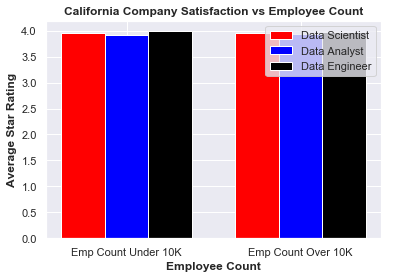

In [59]:
ds_emp_stars_CA = (ds_jobs_CA_emp_under_10K_stars, ds_jobs_CA_emp_over_10K_stars)
da_emp_stars_CA = (da_jobs_CA_emp_under_10K_stars, da_jobs_CA_emp_over_10K_stars)
de_emp_stars_CA = (de_jobs_CA_emp_under_10K_stars, de_jobs_CA_emp_over_10K_stars)

# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(ds_emp_stars_CA))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, ds_emp_stars_CA, color='#ff0000', width=barWidth, edgecolor='white', label='Data Scientist')
plt.bar(r2, da_emp_stars_CA, color='#0000ff', width=barWidth, edgecolor='white', label='Data Analyst')
plt.bar(r3, de_emp_stars_CA, color='#000000', width=barWidth, edgecolor='white', label='Data Engineer')
 
# Add xticks on the middle of the group bars
plt.xlabel('Employee Count', fontweight='bold')
plt.ylabel('Average Star Rating', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(ds_emp_stars_CA))], ['Emp Count Under 10K', 'Emp Count Over 10K'])
plt.title('California Company Satisfaction vs Employee Count', fontweight='bold')
 
# Create legend & Show graphic
plt.legend(loc='upper right')
plt.show()



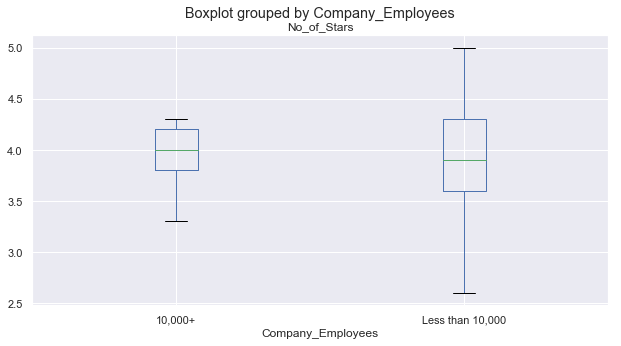

In [60]:
dropna_stars_emp_df_CA.boxplot("No_of_Stars", by="Company_Employees", figsize=(10, 5),showfliers=False)

In [61]:
grp_ds_emp_stars_CA = ds_emp_stars_CA
grp_da_emp_stars_CA = da_emp_stars_CA
grp_de_emp_stars_CA = de_emp_stars_CA

stat_grp_emp_stars_CA=stats.f_oneway(grp_ds_emp_stars_CA,grp_da_emp_stars_CA,grp_de_emp_stars_CA)
stat_grp_emp_stars_CA

F_onewayResult(statistic=8.440792732815348, pvalue=0.05861453991505352)

In [88]:
#formatting presets
title_font = {'size':'14', 'color':'black', 'weight':'bold','verticalalignment':'bottom'}
# Bottom vertical alignment for more space
axis_font = { 'size':'13','fontweight': 'bold'}




/Users/elena/anaconda2/envs/PythonData/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


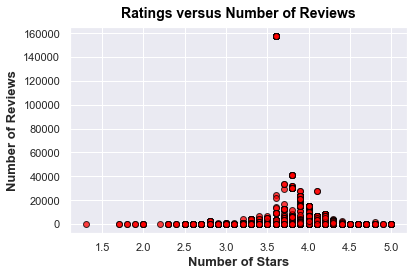

In [92]:
fig1 = plt.figure()

#scatter plot -- number of reviews vs number of stars
reviews = job_df["No_of_Reviews"]
stars = job_df["No_of_Stars"]

plt.scatter(stars, reviews, marker="o", facecolors="red", edgecolors="black"
            , alpha=0.75)

plt.ylabel("Number of Reviews", axis_font)
plt.xlabel("Number of Stars", axis_font)
plt.title ("Ratings versus Number of Reviews", title_font)
plt.tight_layout()
fig1.show()

# Industry vs Estimated Salary (US)

In [93]:
#column with industries in it 

industry =[]

for index, row in job_df.iterrows():
    if (row['Consulting and Business Services'] == 1):
        industry.append ("Consulting")
    
    elif (row['Internet and Software'] == 1):
        industry.append("Internet and Software")
    
    elif (row['Internet and Software'] == 1):
        industry.append("Internet and Software")
    
    elif (row['Banks and Financial Services'] == 1):
        industry.append("Banks and Financial Services")
    
    elif (row['Health Care'] == 1):
        industry.append("Health Care") 
    
    elif (row['Insurance'] == 1):
        industry.append("Insurance")
    
    elif (row['Other_industries'] == 1):
        industry.append("Other")
    else :
        industry.append ("Unspecified")
    
print (len(industry))

job_df["Industry"]= industry      



5715


In [94]:
industry_groupby= job_df.groupby(["Industry", "Queried_Salary"])

industry_groupby=industry_groupby["Job_Title"].count().unstack()
reorganized_industry_groupby = industry_groupby[['<80000','80000-99999', '100000-119999', 
                                                 '120000-139999', '140000-159999', '>160000' ]]

x_axis =reorganized_industry_groupby.columns 




<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

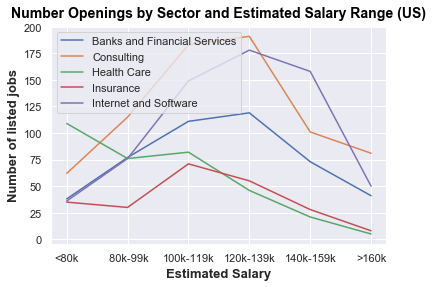

In [106]:
 # line graphs of salaries and counts
fig2 = plt.figure()
for index, row in reorganized_industry_groupby.iterrows():
    if (row.name!= "Other")& (row.name != "Unspecified"):
        plt.plot(x_axis, row)
        
        
plt.xticks([x for x in range(len(x_axis))],['<80k', ' 80k-99k', '100k-119k','120k-139k', '140k-159k',
                                          '>160k']) 
plt.title ("Number Openings by Sector and Estimated Salary Range (US)", **title_font )
plt.xlabel ("Estimated Salary", **axis_font )
plt.ylabel ("Number of listed jobs", **axis_font)
plt.legend (bbox_to_anchor=(0, 1), loc=2) 
fig2.show


# Industry vs. Estimated Salary (CA)

In [107]:
only_CA_df= job_df.loc[job_df["CA"] == 1, :]
len (only_CA_df)

1395

In [108]:

CA_industry_groupby= only_CA_df.groupby(["Industry", "Queried_Salary"])

CA_industry_groupby=CA_industry_groupby["Job_Title"].count().unstack()
reorganized_CA_industry_groupby = industry_groupby[['<80000','80000-99999', '100000-119999', 
                                                 '120000-139999', '140000-159999', '>160000' ]]

x_axis =reorganized_CA_industry_groupby.columns 



<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

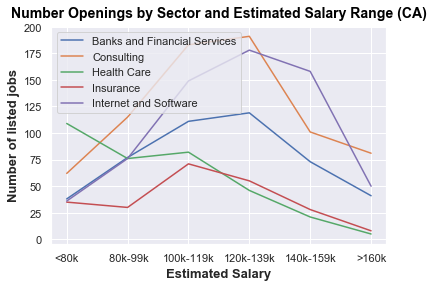

In [109]:
# line graphs of salaries and counts
fig3 = plt.figure()
for index, row in reorganized_CA_industry_groupby.iterrows():
    if (row.name!= "Other")& (row.name != "Unspecified"):
        plt.plot(x_axis, row)
        
        
plt.xticks([x for x in range(len(x_axis))],['<80k', ' 80k-99k', '100k-119k','120k-139k', '140k-159k',
                                          '>160k']) 
plt.title ("Number Openings by Sector and Estimated Salary Range (CA)", **title_font )
plt.xlabel ("Estimated Salary", **axis_font )
plt.ylabel ("Number of listed jobs", **axis_font)
plt.legend (bbox_to_anchor=(0, 1), loc=2) 
fig3.show



In [110]:
#Est salary comp vs states (df construction)
State= []
salary_est = []
job_title=[]


for index, row in job_df.iterrows():
    if (row['TX'] == 1):
        State.append ("TX")
        
    elif (row['Internet and Software'] == 1):
        State.append("CA")
    
    elif (row['NY'] == 1):
          State.append("NY")
    
    elif (row['MA'] == 1):
          State.append("MA")
    
    elif (row['VA'] == 1):
          State.append("VA")
   
    else:
        continue
    
    salary_est.append(row["Queried_Salary"])
    job_title.append (row["Job_Title"])

TX_CA_NY_MA_VA_salaries_df = pd.DataFrame({"State": State, "Estimated Salary": salary_est, "Job Title": job_title })

TX_CA_NY_MA_VA_salaries_df.head()




,State,Estimated Salary,Job Title
0,TX,<80000,Data Scientist
1,TX,<80000,Data Scientist I
2,NY,<80000,Geospatial Data Scientist
3,TX,<80000,Data Scientist
4,MA,<80000,Junior Data Scientist


In [111]:
states_n_salaries_counts = TX_CA_NY_MA_VA_salaries_df.groupby(["State","Estimated Salary"])
states_n_salaries_counts=states_n_salaries_counts["Job Title"].count().unstack()
states_n_salaries_counts = states_n_salaries_counts[['<80000','80000-99999', '100000-119999', 
                                                 '120000-139999', '140000-159999', '>160000' ]]

/Users/elena/anaconda2/envs/PythonData/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


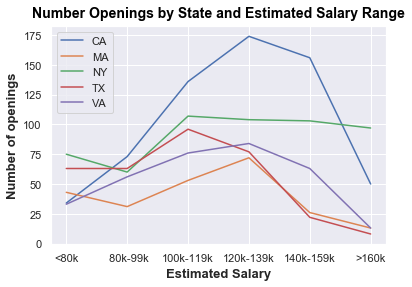

In [112]:

fig4 = plt.figure()
x_axis = states_n_salaries_counts.columns
for index, row in states_n_salaries_counts.iterrows():
    plt.plot(x_axis, row)
    
plt.title ("Number Openings by State and Estimated Salary Range", **title_font )
plt.xlabel ("Estimated Salary", **axis_font )
plt.ylabel ("Number of openings", **axis_font)
plt.legend ( loc="best") 
plt.xticks([x for x in range(len(x_axis))],['<80k', ' 80k-99k', '100k-119k','120k-139k', '140k-159k',
                                          '>160k'])    
    
fig4.show()